# Data Generation and Class Balance Analysis

This notebook helps you generate training data using ScannerS and analyze class balance.

## Prerequisites:
* ScannerS must be installed and built correctly
* Model must be configured (from model_selection notebook)
* Selected labels for classification must be set to 'ignore' in the model configuration

In [1]:
import os
import sys

# Setup paths
current_dir = os.path.abspath('')
build_dir = os.path.dirname(os.path.dirname(current_dir))
src_dir = os.path.join(os.path.dirname(current_dir), 'src')
sys.path.append(src_dir)

from utils.scanner_runner import ScannerRunner

# Initialize scanner
scanner = ScannerRunner()

In [2]:
# Configure scan parameters
model = "N2HDMDarkD.ini"  # Your selected model
n_points = 10  # Number of points to generate
output_file = "initial_scan.tsv"  # Output file name

# Selected labels for classification
target_labels = ['valid_BFB', 'valid_Uni', 'valid_STU', 'valid_Higgs']

# Run scan
print(f"Running scan for {model} with {n_points} points...")
try:
    output_path = scanner.run_scan(model, n_points, output_file)
    print(f"Scan completed. Output saved to: {output_path}")
except Exception as e:
    print(f"Scan failed: {e}")

Running scan for N2HDMDarkD.ini with 10 points...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 ~                                                        ~
 ~                   HiggsBounds 5.9.0                    ~
 ~                                                        ~
 ~             Philip Bechtle, Sven Heinemeyer,           ~
 ~              Tobias Klingl, Tim Stefaniak,             ~
 ~             Georg Weiglein, Jonas Wittbrodt            ~
 ~                                                        ~
 ~            arXiv:0811.4169, arXiv:1102.1898,           ~
 ~            arXiv:1301.2345, arXiv:1311.0055,           ~
 ~            arXiv:1507.06706                            ~
 ~       https://gitlab.com/higgsbounds/higgsbounds       ~
 ~                                                        ~
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 HiggsBounds collects together results from 

     * the LEP collaborations and LEP Higgs Working Group
    

Scan completed. Output saved to: initial_scan.tsv



Recommendations for additional scans:
- WARNING: Total points (10) is very low. Recommend running at least 1000 points for reliable statistics.
- Label valid_Uni is severely imbalanced: missing class(es) {1}
- Label valid_STU is imbalanced: class 1 has only 1 points (10.0%)
- Joint class distribution is incomplete: found 4 out of 16 possible combinations
- Joint class 0_0_1_1 is underrepresented: only 1 points (10.0%)


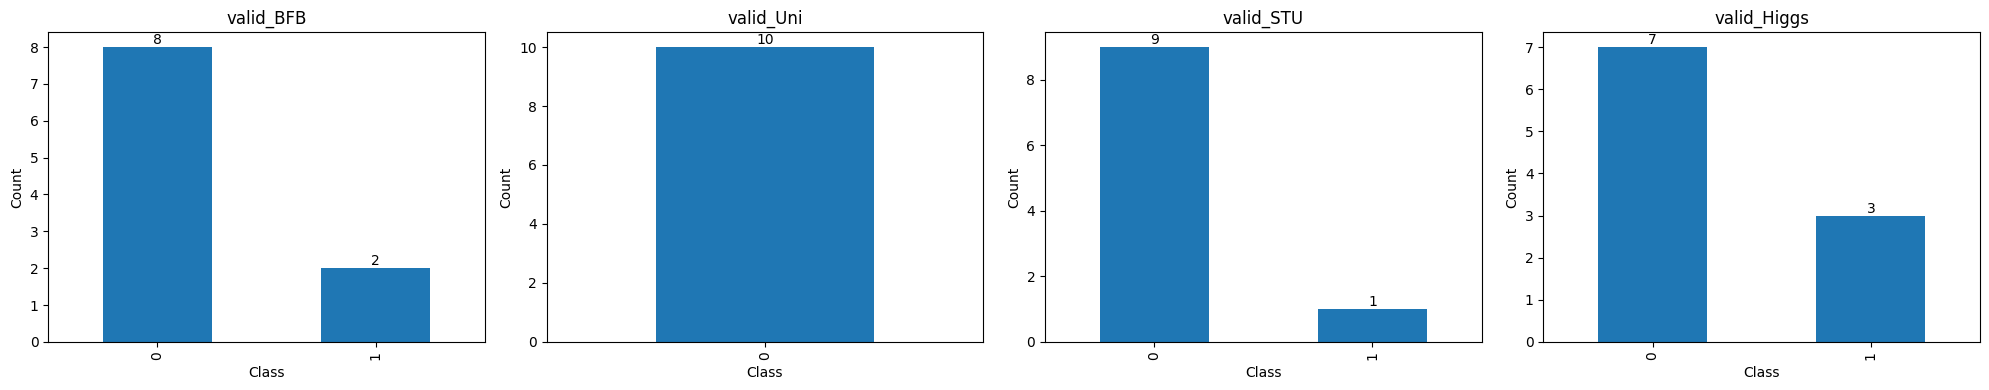

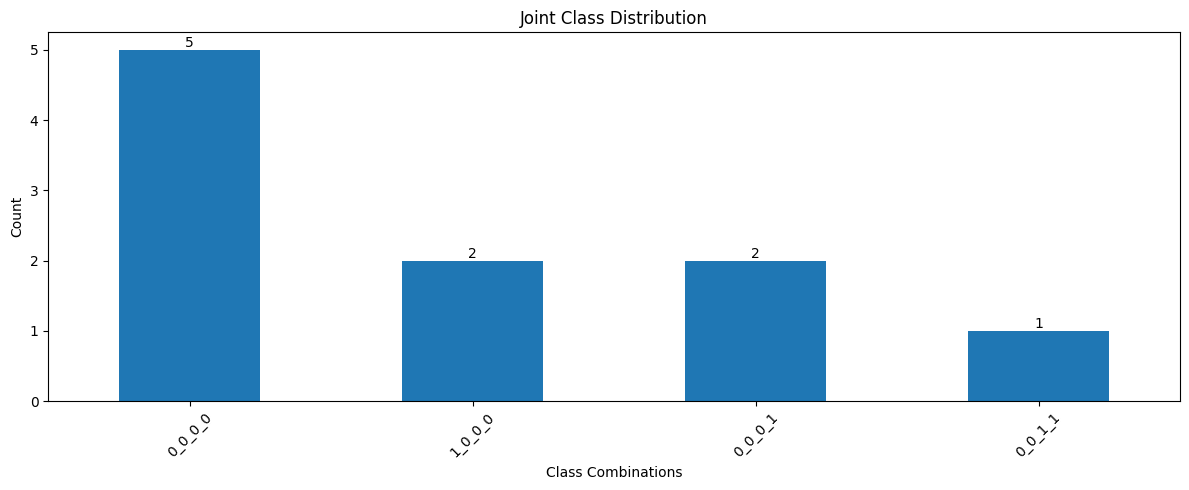

In [3]:
# Analyze class balance
stats = scanner.analyze_class_balance(output_file, target_labels)

# Plot distributions
scanner.plot_class_distribution(stats, "Initial Scan Class Distribution")

# Get recommendations
recommendations = scanner.recommend_additional_scans(stats)
if recommendations:
    print("\nRecommendations for additional scans:")
    for rec in recommendations:
        print(f"- {rec}")
else:
    print("\nClass balance looks good! No additional scans needed.")